In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def z(x, w, b):
    return np.dot(x.T, w.T) - b

#define output of neuron
def output(x, win, wout, b):
    return np.dot(sigmoid(z(x, win, b)), wout.T)

# calculate loss function
def loss(x, win, wout, b):
    sum = 0
    for i in x.T:
        sum += (np.sign(i[0]*i[1]) - sigmoid(output(i, win, wout, b)))**2

    return sum
# calculate gradient of loss function for win
def grad_win1(x, win, wout, b):
    sum = 0
    for i in x.T:
        sum += 2*np.matmul(((np.sign(i[0]*i[1]) - output(i, win, wout, b)) * wout * sigmoid(output(i, win, wout, b)) * (1 - sigmoid(output(i, win, wout, b))) * sigmoid(z(i, win, b)) * (1 - sigmoid(z(i, win, b)))).reshape(4, 1), i.reshape(1, 2))
    return sum

# calculate gradient of loss function for wout
def grad_wout1(x, win, wout, b):
    sum = 0
    for i in x.T:
        sum += 2 * (np.sign(i[0]*i[1]) - output(i, win, wout, b)) * sigmoid(output(i, win, wout, b)) * (1 - sigmoid(output(i, win, wout, b))) * sigmoid(z(i, win, b))
    return sum

# calculate gradient of loss function for b
def grad_b1(x, win, wout, b):
    sum = 0
    for i in x.T:
        sum += 2 * (np.sign(i[0]*i[1]) - output(i, win, wout, b)) * wout * sigmoid(output(i, win, wout, b)) * (1 - sigmoid(output(i, win, wout, b))) * sigmoid(z(i, win, b)) * (1 - sigmoid(z(i, win, b)))
    return sum



# update weights randomly
def update_weights(x, win, wout, b, lr):
    win = win + lr * grad_win1(x, win, wout, b)*random(win.shape)
    wout = wout + lr * grad_wout1(x, win, wout, b)*random(wout.shape)
    b = b + lr * grad_b1(x, win, wout, b)*random(b.shape)
    return win, wout, b
    

n_inputs = 2
n_hidden1 = 4

# generate data x0 ist x value, x1 is y value
xdata = np.random.uniform(-5, 5, (2, 100))

# random selection
def random(shape):
    return np.sign(np.random.uniform(-0.8, 0.2, shape))*0.5 + 0.5




#input weights
# first input neuron, second outout neuron
w1 = np.random.randn(n_inputs, n_hidden1).T
#bias
b1 = np.random.randn(n_hidden1)
#output weights
wOut = np.random.randn(n_hidden1)
counter = 0


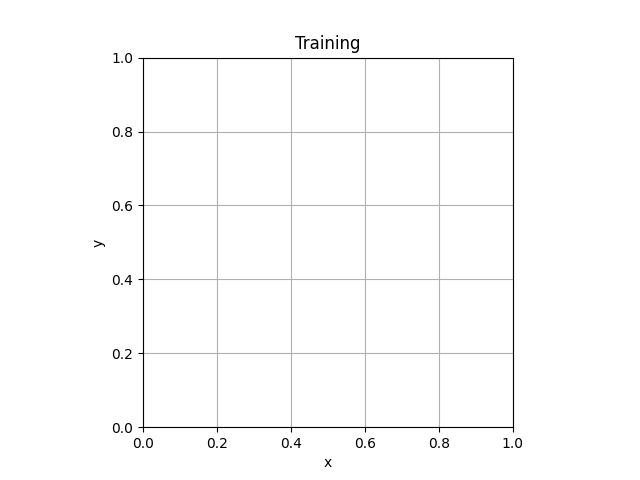

w1: [[ 0.12239334 -1.38992693]
 [ 0.83943752  0.77775169]
 [-0.18568874 -0.15076137]
 [-0.29888776 -0.71574752]] wOut: [-1.09089017  0.3588335  -0.27087629  1.09985948] b1: [-0.51778196 -0.21933233 -0.31413395 -0.11904547] loss: 121.94847942795764
w1: [[-0.01069926 -1.35396337]
 [ 0.80712363  0.83534917]
 [-0.14773721 -0.2444691 ]
 [-0.28030586 -0.73201611]] wOut: [-1.05354551  0.27540664 -0.25187398  1.08995649] b1: [-0.56829297 -0.36512886 -0.28770124 -0.24517055] loss: 122.10630851833774
w1: [[-0.19104847 -1.3424833 ]
 [ 0.75026717  0.87220327]
 [-0.11943431 -0.31134016]
 [-0.24237203 -0.73480818]] wOut: [-1.04527425  0.1975077  -0.2301855   1.07992393] b1: [-0.57229438 -0.45842014 -0.2764554  -0.34091151] loss: 121.68142580959108
w1: [[-0.2447136  -1.32828693]
 [ 0.72353464  0.89308281]
 [-0.08203078 -0.34215739]
 [-0.19366896 -0.73512828]] wOut: [-1.05415839  0.13002904 -0.19701326  1.06590941] b1: [-0.50179945 -0.51110885 -0.27192148 -0.45127295] loss: 121.53680182947576
w1: [[-0

In [3]:

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100, 100))

def animate(i):
    global w1, b1, wOut, counter
    for i in range(50):
        w1, wOut, b1 = update_weights(xdata, w1, wOut, b1, 0.01)

    ax.clear()
    counter += 1
    #plot contour

    for i in range(100):
        for j in range(100):
            Z[i, j] = output(np.array([X[i, j], Y[i, j]]), w1, wOut, b1)
    ax.pcolor(X, Y, Z, cmap='RdBu', vmin=-1, vmax=1)
    ax.scatter(xdata[0], xdata[1], c=np.sign(xdata[0]*xdata[1]))

    ax.set_title("loss: " + str(loss(xdata, w1, wOut, b1)) + " counter: " + str(counter))
    print("w1: " + str(w1) + " wOut: " + str(wOut) + " b1: " + str(b1) + " loss: " + str(loss(xdata, w1, wOut, b1)))


# plot data while training
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.grid()
ax.set_title('Training')
ax.set_xlabel('x')
ax.set_ylabel('y')
ani = animation.FuncAnimation(fig, animate, frames=10000, interval=3, repeat=False)
plt.show()
# fn = 'neuro'
# ani.save(fn+'.gif',writer='ffmpeg')
# plt.rcParams['animation.html'] = 'html5'
# ani



